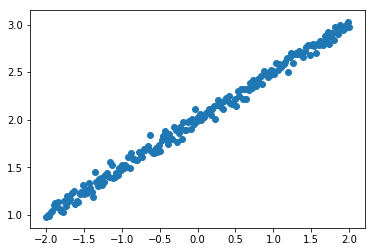

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
 
 
#构造数据
X = np.linspace(-2, 2, 200)
np.random.shuffle(X)    # randomize the data
#添加一些噪音数据
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
 
# 显示输入数据
plt.scatter(X, Y)
plt.show()

In [3]:
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
X_test, Y_test = X[160:], Y[160:]       # last 40 data points

In [4]:
# build a neural network from the 1st layer to the last layer
model = Sequential()
model.add(Dense(units=1,activation='relu', input_dim=1))

In [5]:
# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

In [6]:
model.fit(X_train, Y_train, epochs=100,verbose=0, batch_size=64,)

In [7]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
40/40 [==============================] - 0s 646us/step
test cost: 0.003783656982704997
Weights= [[0.4896411]] 
biases= [1.9687585]


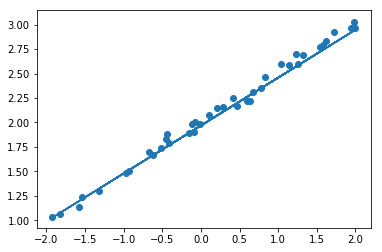

In [8]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()